In [1]:
import rasterio
import numpy as np
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit_transform(self, X):
        # Standardize the data
        self.mean = np.mean(X) 
        X_standardized = (X - self.mean) / np.std(X)

        # Calculate covariance matrix
        covariance_matrix = np.cov(X_standardized, rowvar=False)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors in descending order
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[:, indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        # Project data onto the selected components
        principal_components = np.dot(X_standardized, self.components)

        return principal_components

    def inverse_transform(self, principal_components):
        # Reconstruct data from principal components
        reconstructed_data = np.dot(principal_components, self.components.T) + self.mean
        return reconstructed_data

# Example usage



In [ ]:

def performPCA(x):
    # x_std = StandardScaler().fit_transform(x)
    x_std = x - np.mean(x, axis=0)
    cov = np.cov(x_std.T)
    ev , eig = np.linalg.eig(cov)
    a = eig.dot(x_std.T)


    return a

: 

In [3]:
path = "./IMG_DATA/R20m"
import os

band_paths = []
for i in os.listdir(path=path):
    # for j in os.listdir(path=path + "/" + i):
    band_paths.append(path + "/" + i)


band_paths.sort()
band_paths = band_paths[1:-3]

band_paths

bands = []

for band_path in band_paths:
    with rasterio.open(band_path) as src:
        band = src.read(1)  # Assuming the bands are single-band
        bands.append(band)


Concatenated image shape: (10, 5490, 5490)


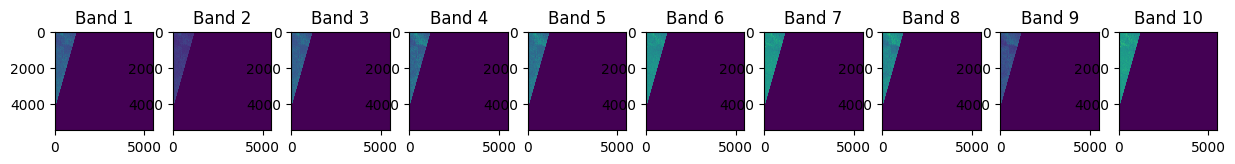

In [5]:

# Visualize different bands
fig, axes = plt.subplots(1, len(bands), figsize=(15, 5))
for i in range(len(bands)):
    axes[i].imshow(bands[i])
    axes[i].set_title(f'Band {i+1}')


concatenated_image = np.stack(bands, axis=0)
print("Concatenated image shape:", concatenated_image.shape)

In [8]:
# Assuming concatenated_image is a list of images
for idx, i in enumerate(concatenated_image):
    pca = CustomPCA(n_components=100)
    principalComponents = pca.fit_transform(i)

    # Reconstruct the data in the original space
    X_reconstructed = pca.inverse_transform(principalComponents)

    # Calculate Reconstruction Error
    reconstruction_error = np.sum((i - X_reconstructed) ** 2) / i.size  # Divide by the total number of elements for normalization
    print(f"Reconstruction Error for image {idx + 1}:", reconstruction_error)

    # Calculate Variance Retained
    # variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
    # print(f"Variance Retained for image {idx + 1}:", variance_retained)



Reconstruction Error for image 1: 734.6695147508995
Reconstruction Error for image 2: 2943.716557701535
Reconstruction Error for image 3: 4151.860753407938
Reconstruction Error for image 4: 7858.666393368716
Reconstruction Error for image 5: 6359.377571021735
Reconstruction Error for image 6: 5700.467112817904
Reconstruction Error for image 7: 7200.252738888164
Reconstruction Error for image 8: 7778.631568737262
Reconstruction Error for image 9: 9385.966635596089
Reconstruction Error for image 10: 7699.96884799752


In [11]:
from sklearn.decomposition import PCA

# Assuming concatenated_image is a list of images
for idx, i in enumerate(concatenated_image):
    pca = PCA(n_components=100)
    principalComponents = pca.fit_transform(i)

    # Reconstruct the data in the original space
    X_reconstructed = pca.inverse_transform(principalComponents)

    # Calculate Mean Squared Error (MSE)
    mse = np.sum((i - X_reconstructed) ** 2) / i.size  # Divide by the total number of elements for normalization
    print(f"MSE for image {idx + 1}:", mse)

    # Calculate Explained Variance
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Explained Variance for image {idx + 1}:", explained_variance)

    # Calculate Information Loss
    information_loss = 1 - explained_variance
    print(f"Information Loss for image {idx + 1}:", information_loss)

MSE for image 1: 735.1185685003069
Explained Variance for image 1: 0.9912808985841501
Information Loss for image 1: 0.008719101415849861
MSE for image 2: 2946.5431606236357
Explained Variance for image 2: 0.9760040830074092
Information Loss for image 2: 0.02399591699259085
MSE for image 3: 4155.688868862426
Explained Variance for image 3: 0.9770164910587918
Information Loss for image 3: 0.022983508941208153
MSE for image 4: 7871.995556420787
Explained Variance for image 4: 0.9659162123006716
Information Loss for image 4: 0.034083787699328405
MSE for image 5: 6366.529595439122
Explained Variance for image 5: 0.9796651419176345
Information Loss for image 5: 0.02033485808236546
MSE for image 6: 5705.309227582
Explained Variance for image 6: 0.9879762433460239
Information Loss for image 6: 0.012023756653976148
MSE for image 7: 7210.573999413055
Explained Variance for image 7: 0.9870729023086947
Information Loss for image 7: 0.01292709769130529
MSE for image 8: 7784.820477980179
Explained V

In [ ]:
X_reconstructed = pca.inverse_transform(principalComponents)

# Calculate Reconstruction Error
reconstruction_error = np.sum((principalComponents - X_reconstructed) ** 2)
print("Reconstruction Error:", reconstruction_error)

# Calculate Variance Retained
variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
print("Variance Retained:", variance_retained)

: 

In [9]:
from sklearn.decomposition import PCA

# Assuming concatenated_image is a list of images
for idx, i in enumerate(concatenated_image):
    pca = PCA(n_components=100)
    principalComponents = pca.fit_transform(i)

    # Reconstruct the data in the original space
    X_reconstructed = pca.inverse_transform(principalComponents)

    # Calculate Reconstruction Error
    reconstruction_error = np.sum((i - X_reconstructed) ** 2) / i.size  # Divide by the total number of elements for normalization
    print(f"Reconstruction Error for image {idx + 1}:", reconstruction_error)

    # Calculate Variance Retained
    # variance_retained = np.sum(pca.explained_variance_) / np.sum(pca.explained_variance_ratio_)
    # print(f"Variance Retained for image {idx + 1}:", variance_retained)


Reconstruction Error for image 1: 734.9932593082945
Reconstruction Error for image 2: 2946.2151620981253
Reconstruction Error for image 3: 4154.495138043092
Reconstruction Error for image 4: 7866.474773064598


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume X is your data
# Vary the number of principal components
num_components_list = range(1, 50)

reconstruction_errors = []
explained_variances = []
X_reconstructed = []
for num_components in num_components_list:
    pca = PCA(n_components=num_components)

    for i in concatenated_image:
        X_pca = pca.fit_transform(i)
        X_reconstructed = pca.inverse_transform(X_pca)

        # Calculate reconstruction error
        reconstruction_error = np.sum((i - X_reconstructed) ** 2) / np.prod(i.shape)
        reconstruction_errors.append(reconstruction_error)
        
        # Calculate explained variance ratio
        explained_variance = np.sum(pca.explained_variance_ratio_)
        explained_variances.append(explained_variance)

# Plot the results


: 

In [ ]:
plt.imshow(X_reconstructed)

: 

In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_components_list, reconstruction_errors, marker='o')
plt.title('Reconstruction Error vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')

plt.subplot(1, 2, 2)
plt.plot(num_components_list, explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()


: 

ValueError: x and y must have same first dimension, but have shapes (25,) and (250,)

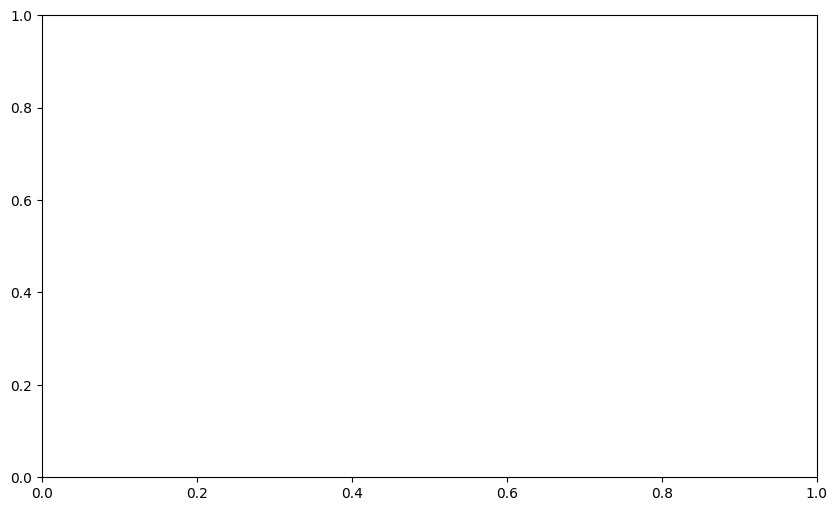

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming concatenated_image is a list of images
# You can modify the range of n_components as needed
num_components_to_test = 25
explained_variances = []

for num_components in range(1, num_components_to_test + 1):
    pca = PCA(n_components=num_components)
    for i in concatenated_image:
        principal_components = pca.fit_transform(i)
        explained_variance = np.sum(pca.explained_variance_ratio_)
        explained_variances.append(explained_variance)

# Create Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components_to_test + 1), explained_variances, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# Create Cumulative Explained Variance Plot
cumulative_explained_variances = np.cumsum(explained_variances)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components_to_test + 1), cumulative_explained_variances, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
